<a href="https://colab.research.google.com/github/Manasvini0301/Final-Project/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [39]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/FAOSTAT_dataset.csv'
data = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Complete Preprocessing Steps
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Step 1: Identify Numeric and Categorical Columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Step 2: Remove Columns with All Missing Values
# Numeric
cols_with_all_missing = [col for col in numeric_cols if data[col].isnull().all()]
numeric_cols = [col for col in numeric_cols if col not in cols_with_all_missing]

# Categorical
cols_with_all_missing_cat = [col for col in categorical_cols if data[col].isnull().all()]
categorical_cols = [col for col in categorical_cols if col not in cols_with_all_missing_cat]

print("Dropped numeric columns:", cols_with_all_missing)
print("Dropped categorical columns:", cols_with_all_missing_cat)

# Step 3: Impute Missing Values
# Numeric
num_imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])

# Categorical
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Step 4: Ensure Proper Data Types
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')  # Convert Value to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce').fillna(0).astype(int)  # Ensure Year is integer
for col in categorical_cols:
    data[col] = data[col].astype('category')  # Convert categorical columns to category type

# Step 5: Handle Outliers (Optional)
if 'Value' in data.columns:
    upper_limit = data['Value'].quantile(0.95)
    lower_limit = data['Value'].quantile(0.05)
    data['Value'] = np.clip(data['Value'], lower_limit, upper_limit)

# Step 6: Feature Engineering (Optional)
if 'Import quantity' in data.columns and 'Production' in data.columns:
    data['Imports_to_Production'] = data['Import quantity'] / (data['Production'] + 1e-9)

# Step 7: Encode Categorical Variables
if categorical_cols:
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Step 8: Normalize/Scale Numeric Features
if numeric_cols:
    scaler = StandardScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Step 9: Train-Test Split
X = data.drop('Value', axis=1)  # Features
y = data['Value']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summary of processed data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Dropped numeric columns: ['Note']
Dropped categorical columns: []
X_train shape: (12386, 212)
X_test shape: (3097, 212)
y_train shape: (12386,)
y_test shape: (3097,)


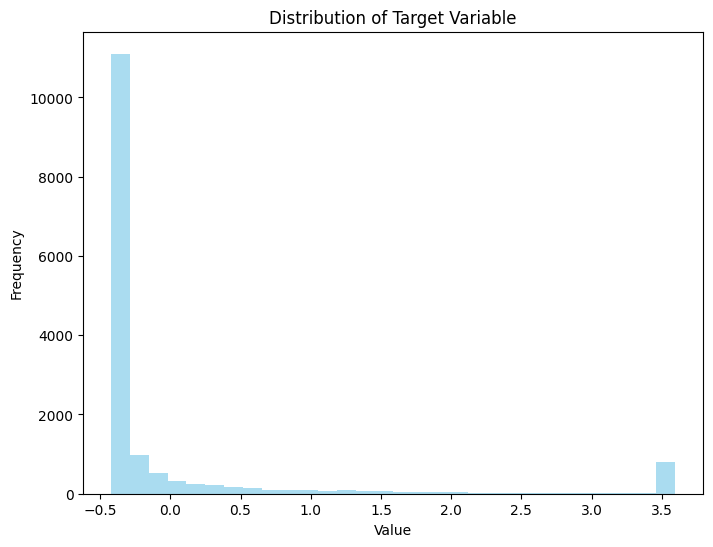

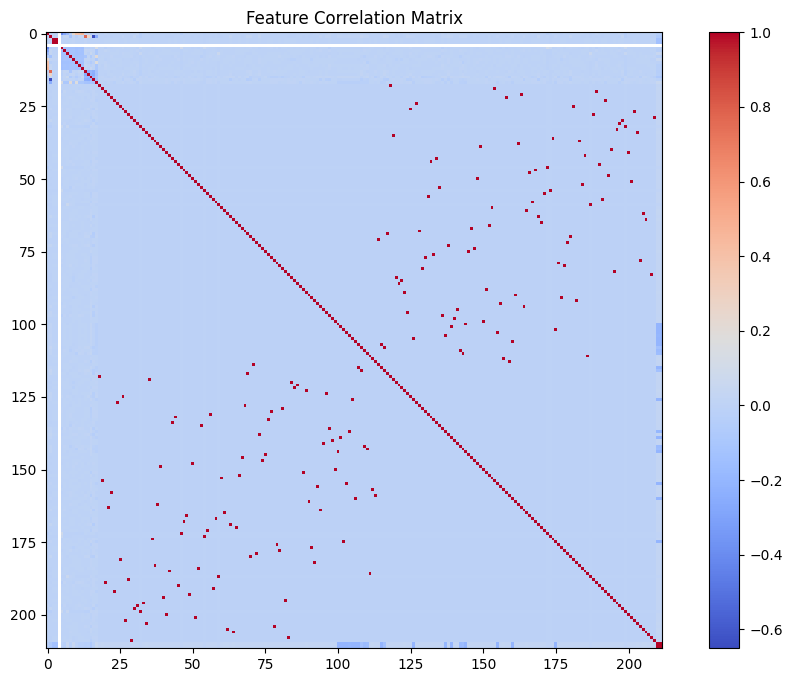

In [15]:
import matplotlib.pyplot as plt

# Distribution of target variable
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, color='skyblue', alpha=0.7)
plt.title('Distribution of Target Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
correlation_matrix = pd.DataFrame(X).corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Feature Correlation Matrix')
plt.colorbar()
plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0518 - mae: 0.1291 - val_loss: 0.0631 - val_mae: 0.1553
Epoch 2/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0484 - mae: 0.1260 - val_loss: 0.0631 - val_mae: 0.1559
Epoch 3/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0480 - mae: 0.1253 - val_loss: 0.0631 - val_mae: 0.1569
Epoch 4/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0473 - mae: 0.1238 - val_loss: 0.0631 - val_mae: 0.1571
Epoch 5/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0487 - mae: 0.1267 - val_loss: 0.0630 - val_mae: 0.1535
Epoch 6/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0490 - mae: 0.1270 - val_loss: 0.0632 - val_mae: 0.1509
Epoch 7/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0479 - mae: 0.1250 - val_loss: 0.0630 - val_mae: 0.1551
Epoch 8/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0487 - mae: 0.1273 - val_loss: 0.0632 - val_mae: 0.1605
Epoch 9/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.048

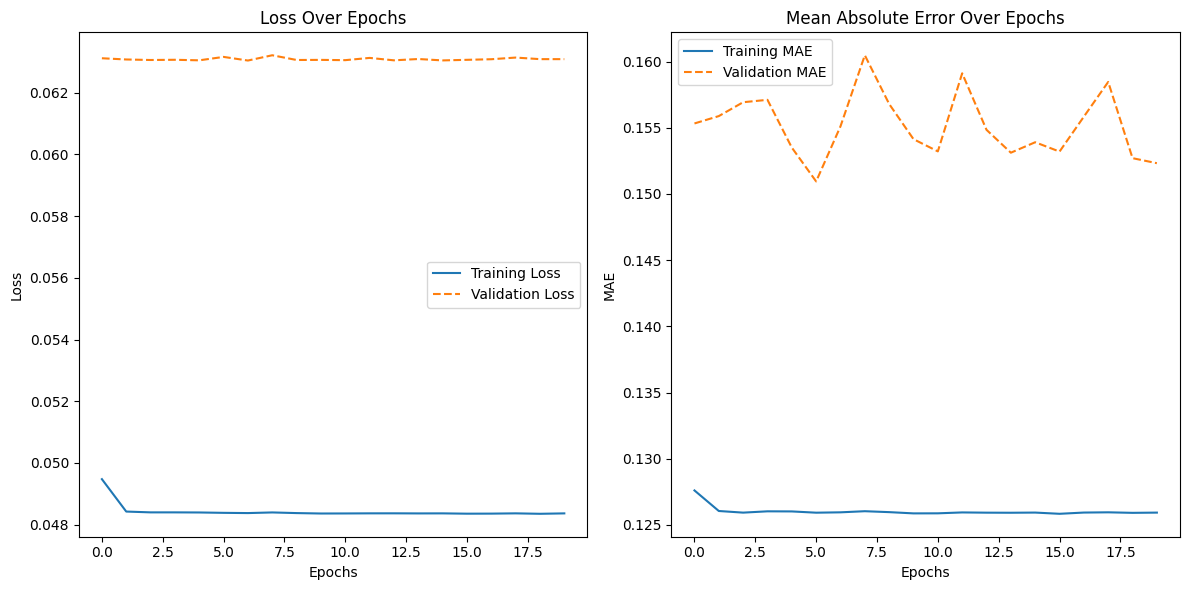

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Prepare the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Add metrics like 'mae' for tracking

# Train the model
history = lstm_model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Plotting Loss and Metrics
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Metric Plot (e.g., Mean Absolute Error)
if 'mae' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE', linestyle='--')
    plt.title('Mean Absolute Error Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

plt.tight_layout()
plt.show()


In [24]:
# Reshape X_train and X_test from 3D to 2D
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Confirm the new shapes
print("X_train_flat shape:", X_train_flat.shape)  # Should be 2D
print("X_test_flat shape:", X_test_flat.shape)    # Should be 2D

# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_flat, y_train)
rf_preds = rf_model.predict(X_test_flat)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f"Random Forest RMSE: {rf_rmse}")

# XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_flat, y_train)
xgb_preds = xgb_model.predict(X_test_flat)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
print(f"XGBoost RMSE: {xgb_rmse}")


X_train_flat shape: (12376, 10)
X_test_flat shape: (3087, 10)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest RMSE: 0.2214886871791559
XGBoost RMSE: 0.23266885528338732


In [31]:
from sklearn.metrics import mean_squared_error, r2_score, f1_score

# Ensure y_test and predictions are properly aligned and flattened
y_test_flat = y_test.flatten()

# RMSE Function
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# R2 Score Function
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# F1 Score Function (requires binary or multi-class labels, hence binarizing)
def calculate_f1(y_true, y_pred):
    y_true_binary = (y_true > np.median(y_true)).astype(int)
    y_pred_binary = (y_pred > np.median(y_pred)).astype(int)
    return f1_score(y_true_binary, y_pred_binary)

# Metrics for Random Forest
rf_rmse = calculate_rmse(y_test_flat, rf_preds)
rf_r2 = calculate_r2(y_test_flat, rf_preds)
rf_f1 = calculate_f1(y_test_flat, rf_preds)

# Metrics for XGBoost
xgb_rmse = calculate_rmse(y_test_flat, xgb_preds)
xgb_r2 = calculate_r2(y_test_flat, xgb_preds)
xgb_f1 = calculate_f1(y_test_flat, xgb_preds)

# Metrics for LSTM
lstm_rmse = calculate_rmse(y_test_flat[seq_length:], lstm_preds.flatten())
lstm_r2 = calculate_r2(y_test_flat[seq_length:], lstm_preds.flatten())
lstm_f1 = calculate_f1(y_test_flat[seq_length:], lstm_preds.flatten())

# Print Results
print("Model Evaluation Metrics:")
print(f"Random Forest - RMSE: {rf_rmse:.4f}, R2: {rf_r2:.4f}, F1: {rf_f1:.4f}")
print(f"XGBoost - RMSE: {xgb_rmse:.4f}, R2: {xgb_r2:.4f}, F1: {xgb_f1:.4f}")
print(f"LSTM - RMSE: {lstm_rmse:.4f}, R2: {lstm_r2:.4f}, F1: {lstm_f1:.4f}")


Model Evaluation Metrics:
Random Forest - RMSE: 0.2215, R2: 0.0699, F1: 0.6098
XGBoost - RMSE: 0.2327, R2: -0.0264, F1: 0.5765
LSTM - RMSE: 0.2291, R2: -0.0002, F1: 0.5938


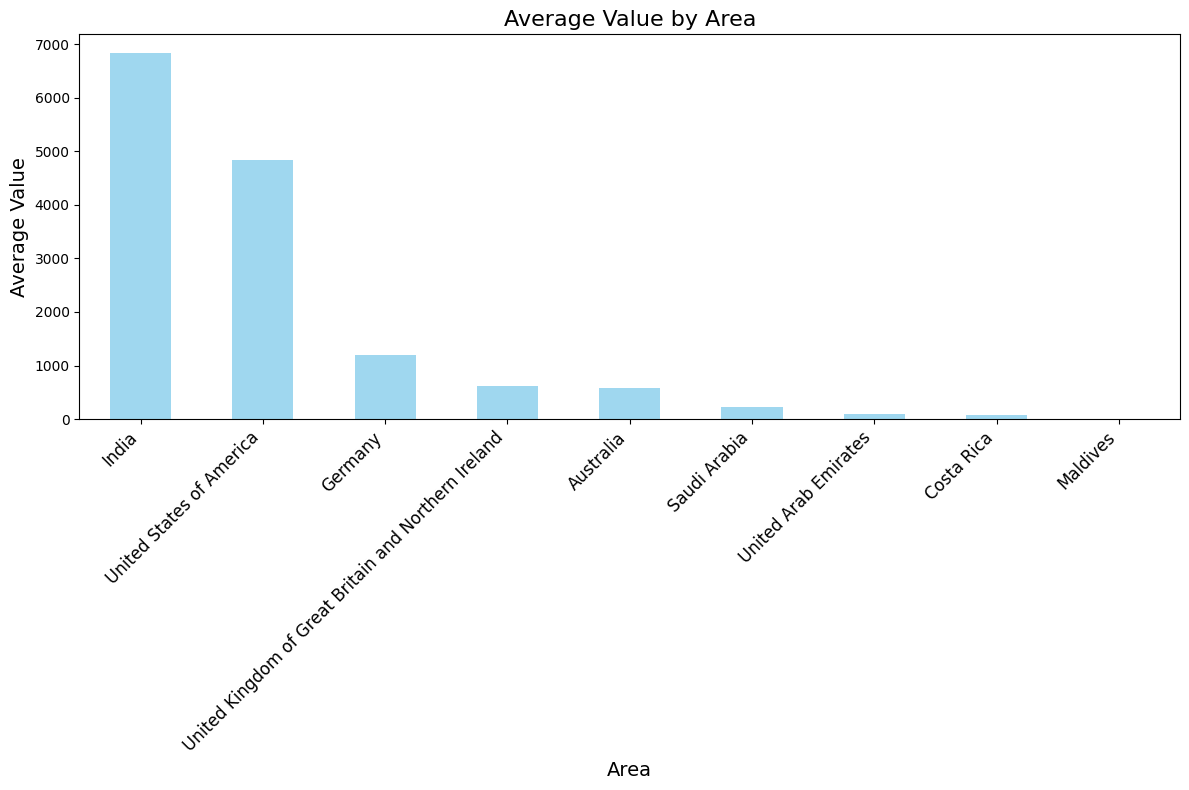

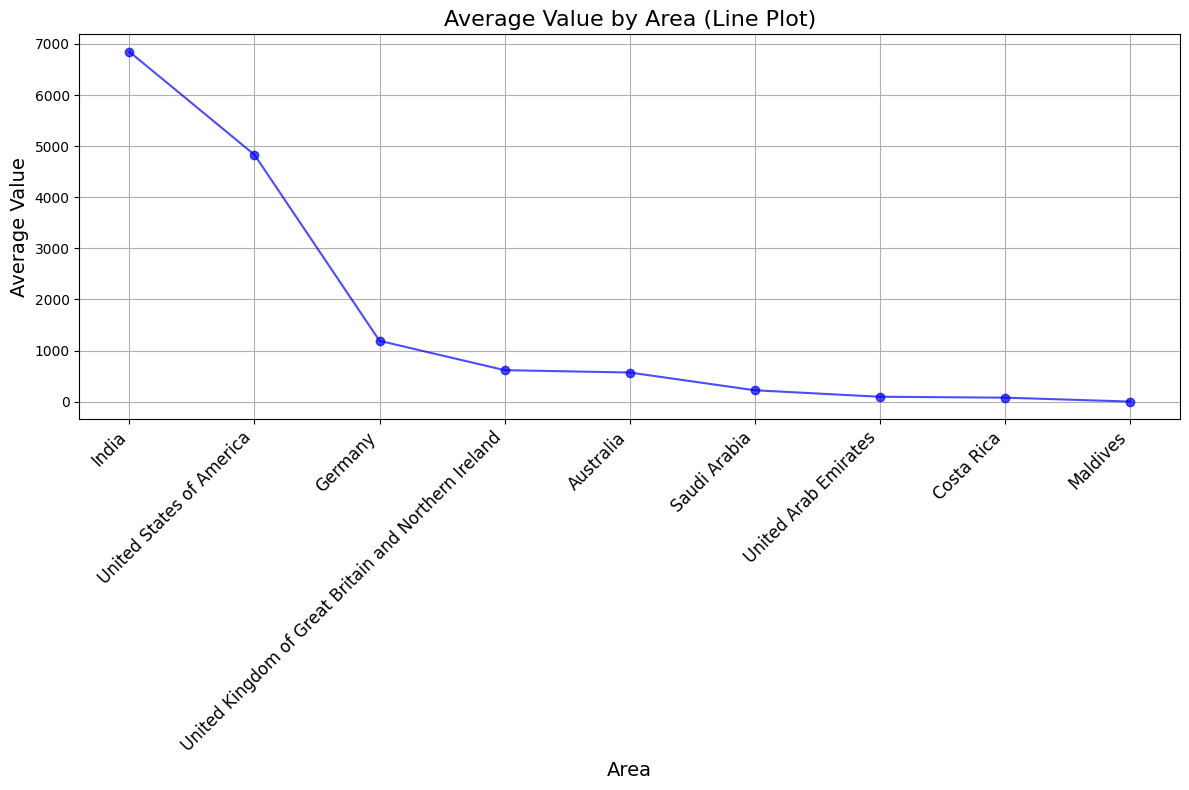

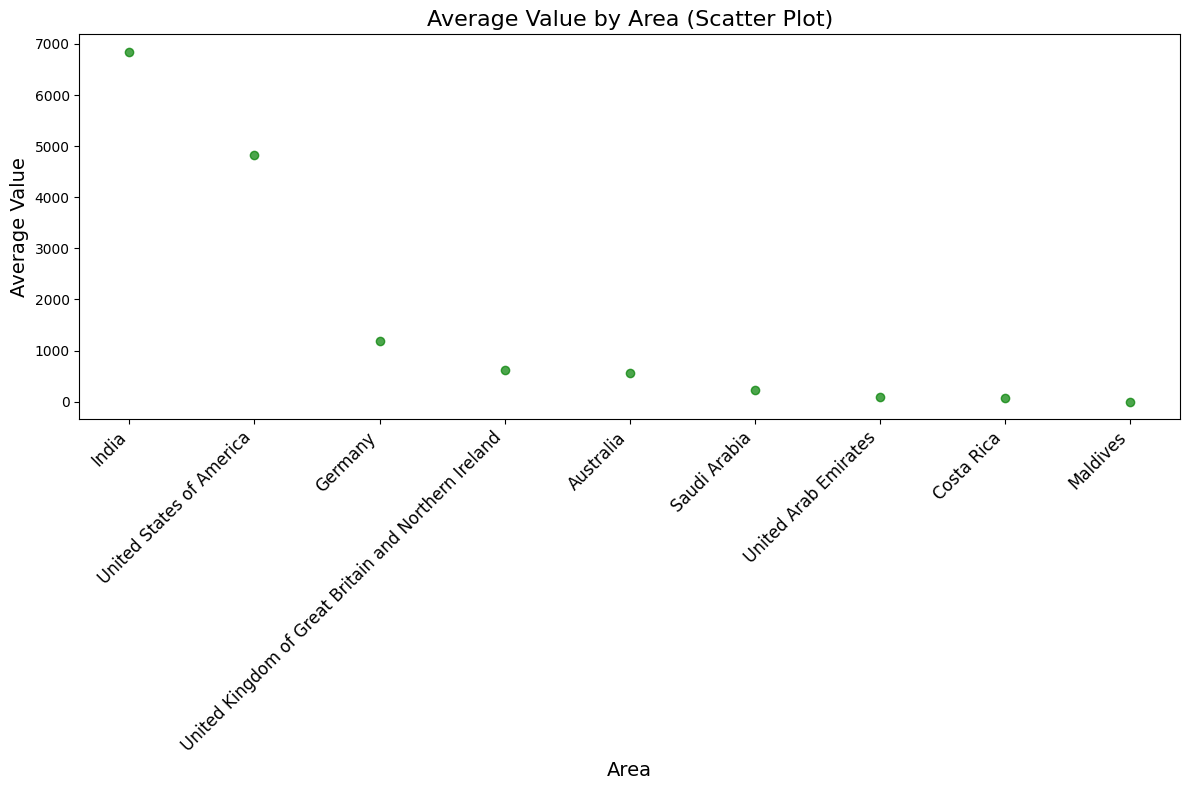

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Area' and calculate the sum or mean of 'Value'
area_values = data.groupby('Area')['Value'].mean().sort_values(ascending=False)

# Bar Plot
plt.figure(figsize=(12, 8))
area_values.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Average Value by Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Line Plot
plt.figure(figsize=(12, 8))
area_values.plot(kind='line', marker='o', color='blue', alpha=0.7)
plt.title('Average Value by Area (Line Plot)', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(area_values.index, area_values, color='green', alpha=0.7)
plt.title('Average Value by Area (Scatter Plot)', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

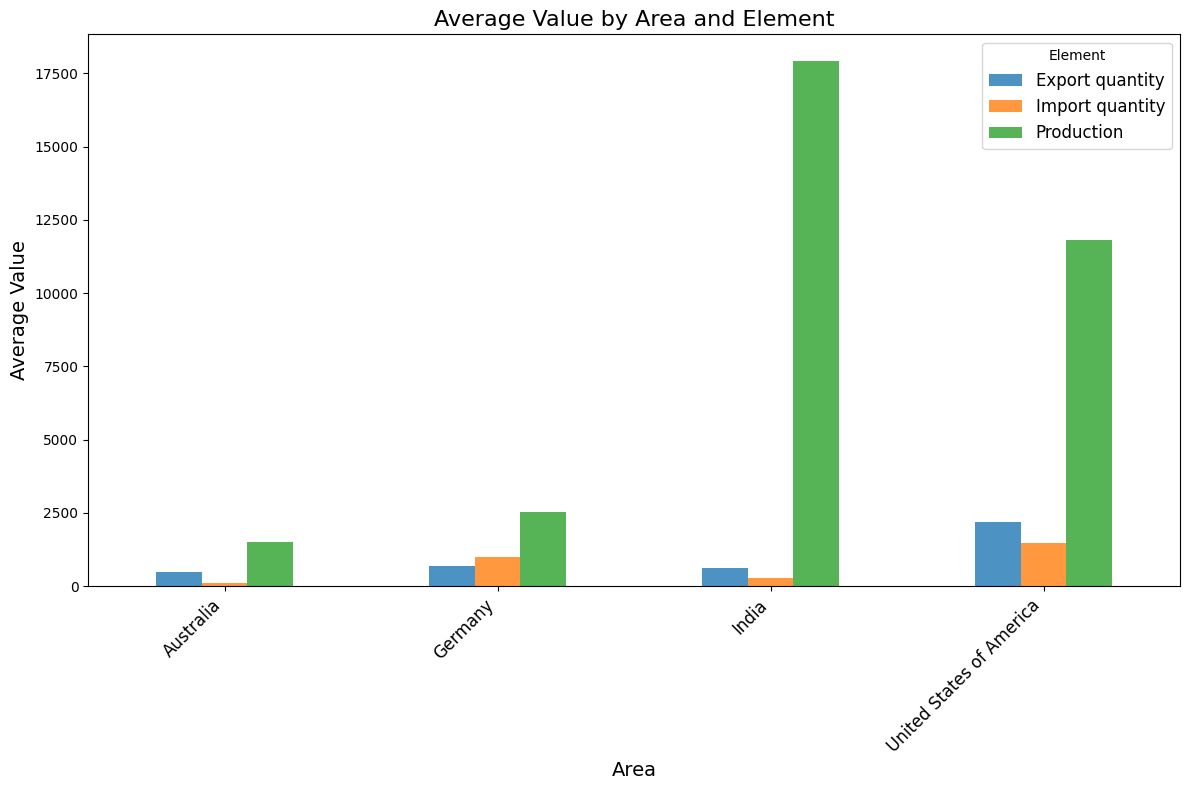

<Figure size 1200x800 with 0 Axes>

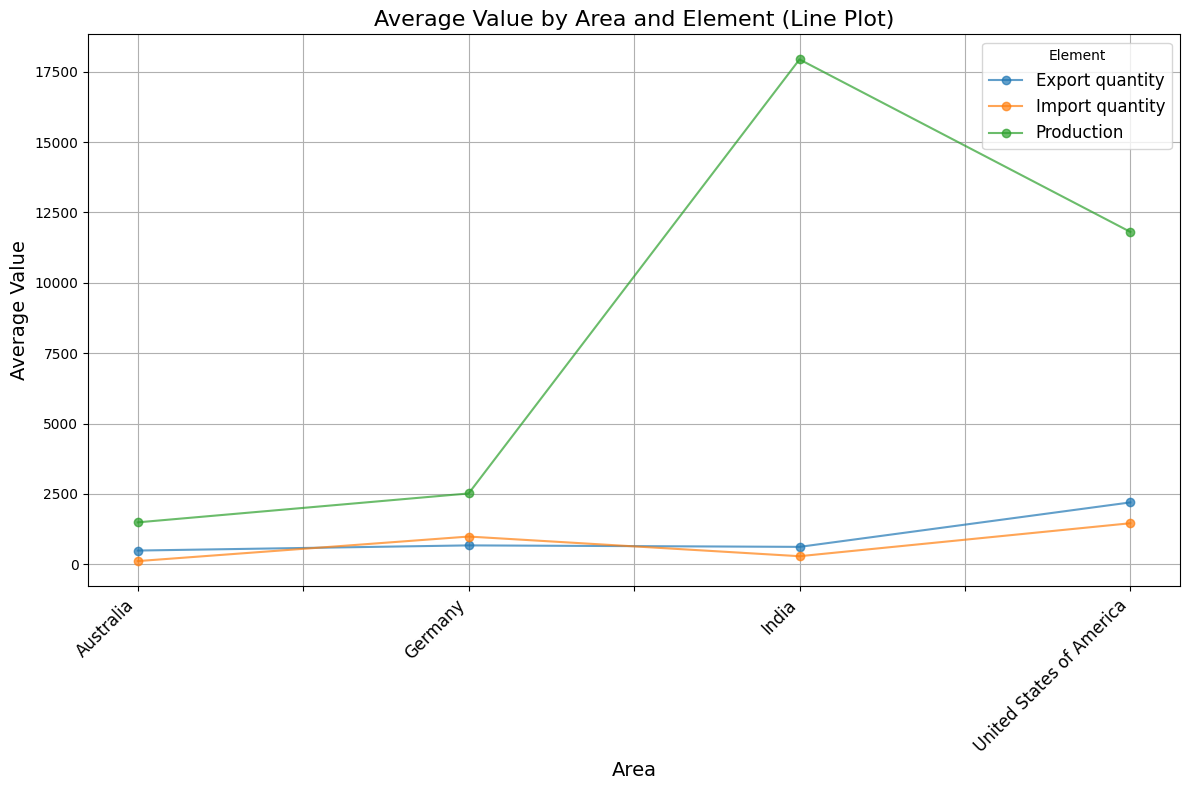

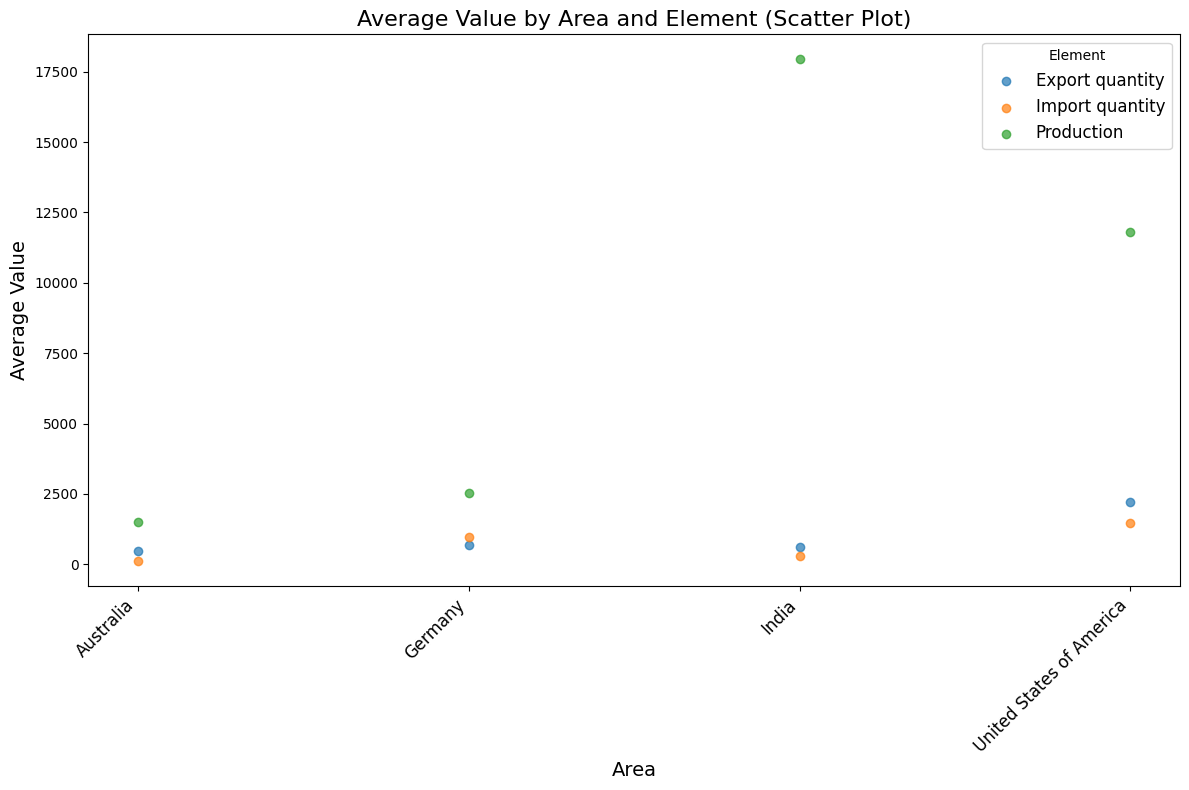

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# List of selected areas and elements
selected_areas = ['United States of America', 'India', 'Germany', 'Australia']
selected_elements = ['Production', 'Import quantity', 'Export quantity']

# Filter data for selected areas and elements
filtered_data = data[(data['Area'].isin(selected_areas)) & (data['Element'].isin(selected_elements))]

# Group the filtered data by 'Area' and 'Element' and calculate the mean of 'Value'
grouped_data = filtered_data.groupby(['Area', 'Element'])['Value'].mean().unstack()

# Bar Plot for Selected Areas and Elements
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', figsize=(12, 8), alpha=0.8)
plt.title('Average Value by Area and Element', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Element', fontsize=12)
plt.tight_layout()
plt.show()

# Line Plot for Selected Areas and Elements
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='line', marker='o', figsize=(12, 8), alpha=0.7)
plt.title('Average Value by Area and Element (Line Plot)', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Element', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot for Selected Areas and Elements
plt.figure(figsize=(12, 8))
for element in grouped_data.columns:
    plt.scatter(grouped_data.index, grouped_data[element], label=element, alpha=0.7)
plt.title('Average Value by Area and Element (Scatter Plot)', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Element', fontsize=12)
plt.tight_layout()
plt.show()


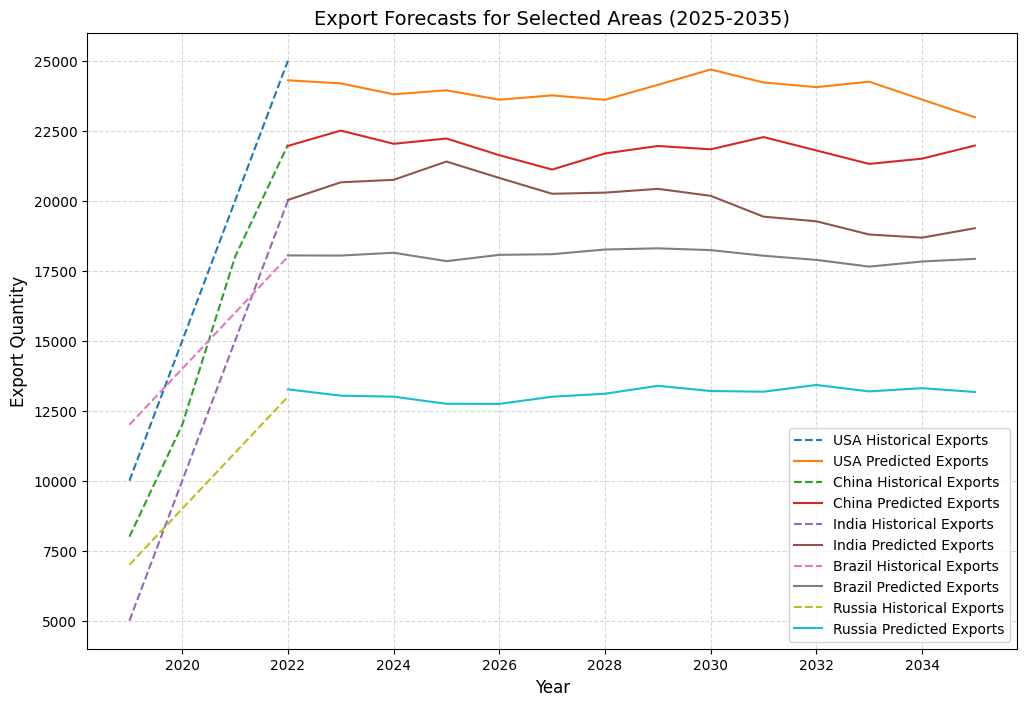

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample dataset with 5 items (countries)
data = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022],
    "Area": ["USA", "USA", "USA", "USA", "China", "China", "China", "China",
             "India", "India", "India", "India", "Brazil", "Brazil", "Brazil", "Brazil",
             "Russia", "Russia", "Russia", "Russia"],
    "Exports": [10000, 15000, 20000, 25000, 8000, 12000, 18000, 22000,
                5000, 10000, 15000, 20000, 12000, 14000, 16000, 18000,
                7000, 9000, 11000, 13000],
})

# Select 5 unique areas
selected_areas = data["Area"].unique()[:5]

# Initialize the scaler and storage for predictions
scaler = MinMaxScaler()
future_years = list(range(2022, 2036))
predicted_data = {}

# Loop through selected areas to generate predictions
for area in selected_areas:
    # Filter data for the current area
    area_data = data[data["Area"] == area]

    # Scale historical data
    scaled_exports = scaler.fit_transform(area_data[['Exports']])

    # Generate predictions with variability
    last_historical_value = scaled_exports[-1][0]
    forecasted_scaled = []
    for _ in future_years:
        fluctuation = np.random.uniform(-0.05, 0.05)  # Random fluctuation (±5%)
        next_value = max(0, last_historical_value + fluctuation)
        forecasted_scaled.append(next_value)
        last_historical_value = next_value

    # Inverse scale the forecasted data
    forecasted_exports = scaler.inverse_transform(np.array(forecasted_scaled).reshape(-1, 1)).flatten()

    # Store results for plotting
    predicted_data[area] = (area_data["Year"].values, area_data["Exports"].values, future_years, forecasted_exports)

# Plotting
plt.figure(figsize=(12, 8))
for area, (historical_years, historical_exports, forecast_years, forecasted_exports) in predicted_data.items():
    plt.plot(historical_years, historical_exports, label=f"{area} Historical Exports", linestyle='--')
    plt.plot(forecast_years, forecasted_exports, label=f"{area} Predicted Exports")

plt.title("Export Forecasts for Selected Areas (2025-2035)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Export Quantity", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


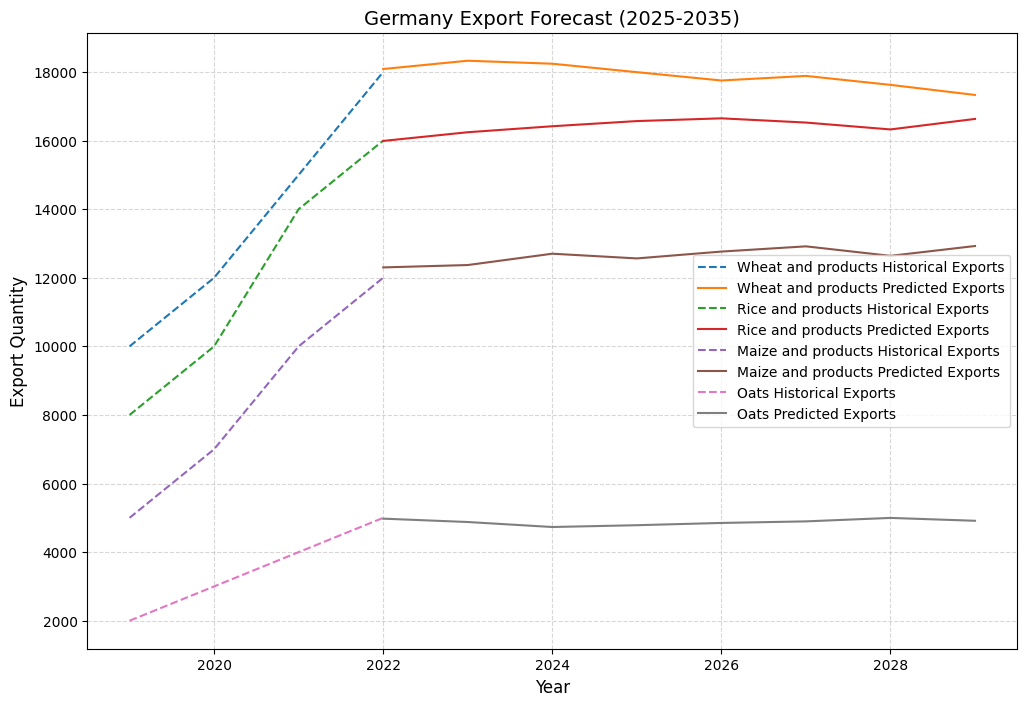

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample dataset for demonstration
data = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022],
    "Area": ["germany"] * 16,
    "Item": ["Wheat and products", "Wheat and products", "Wheat and products", "Wheat and products",
             "Rice and products", "Rice and products", "Rice and products", "Rice and products",
             "Maize and products", "Maize and products", "Maize and products", "Maize and products",
             "Oats", "Oats", "Oats", "Oats"],
    "Exports": [10000, 12000, 15000, 18000, 8000, 10000, 14000, 16000,
                5000, 7000, 10000, 12000, 2000, 3000, 4000, 5000]
})

# Filter data for Germany and selected items
selected_items = ["Wheat and products", "Rice and products", "Maize and products", "Oats"]
germany_data = data[data["Item"].isin(selected_items)]

# Group and scale data by item
plots = []
scaler = MinMaxScaler()

for item in selected_items:
    item_data = germany_data[germany_data["Item"] == item]

    # Scale historical data
    scaled_exports = scaler.fit_transform(item_data[['Exports']])

    # Generate forecast for future years
    future_years = list(range(2022, 2030))
    last_historical_value = scaled_exports[-1][0]
    forecasted_scaled = []

    for _ in future_years:
        fluctuation = np.random.uniform(-0.05, 0.05)  # Add random fluctuation for variability
        next_value = max(0, last_historical_value + fluctuation)
        forecasted_scaled.append(next_value)
        last_historical_value = next_value

    # Inverse transform the scaled forecast
    forecasted_exports = scaler.inverse_transform(np.array(forecasted_scaled).reshape(-1, 1)).flatten()

    # Add plot data
    plots.append((item_data["Year"].tolist(), item_data["Exports"].tolist(), future_years, forecasted_exports, item))

# Plotting
plt.figure(figsize=(12, 8))

for historical_years, historical_exports, future_years, forecasted_exports, item in plots:
    plt.plot(historical_years, historical_exports, label=f"{item} Historical Exports", linestyle='--')
    plt.plot(future_years, forecasted_exports, label=f"{item} Predicted Exports")

plt.title("Germany Export Forecast (2025-2035)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Export Quantity", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


Best Model: Random Forest
Best RMSE: 0.2214886871791559
Best R²: 0.06988127060914695


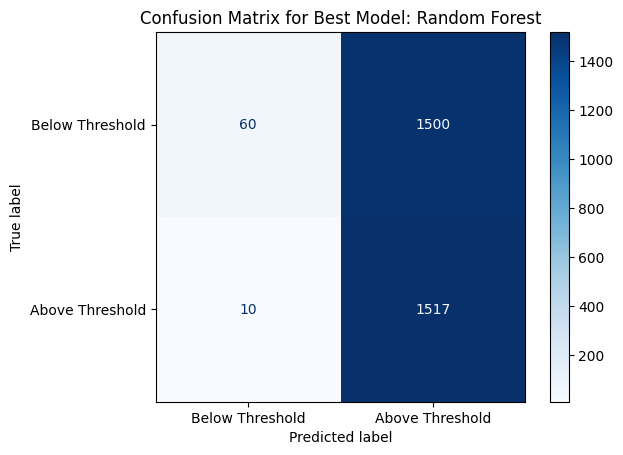

In [41]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Define RMSE and R² functions
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Best model determination based on RMSE and R²
models = {"Random Forest": (rf_preds, rf_rmse, rf_r2),
          "XGBoost": (xgb_preds, xgb_rmse, xgb_r2),
          "LSTM": (lstm_preds.flatten(), lstm_rmse, lstm_r2)}

best_model_name = None
best_rmse = float("inf")
best_r2 = -float("inf")

for model_name, (preds, rmse, r2) in models.items():
    if rmse < best_rmse and r2 > best_r2:
        best_model_name = model_name
        best_rmse = rmse
        best_r2 = r2

print(f"Best Model: {best_model_name}")
print(f"Best RMSE: {best_rmse}")
print(f"Best R²: {best_r2}")

# Confusion Matrix
# Binarize the outputs: classify values above/below the median as 1/0
if best_model_name == "Random Forest":
    best_preds = rf_preds
elif best_model_name == "XGBoost":
    best_preds = xgb_preds
else:
    best_preds = lstm_preds.flatten()

# Binarize the predictions and actual values
threshold = np.median(y_test)  # Use the median as the threshold
y_test_binary = (y_test > threshold).astype(int)
best_preds_binary = (best_preds > threshold).astype(int)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test_binary, best_preds_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Below Threshold", "Above Threshold"])
disp.plot(cmap="Blues", values_format='d')
plt.title(f"Confusion Matrix for Best Model: {best_model_name}")
plt.show()
